In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import blimpy as bl 
%matplotlib inline

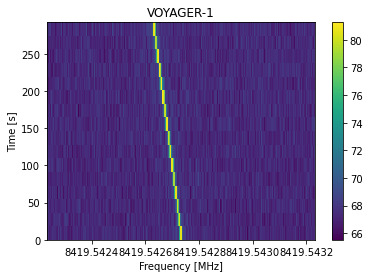

In [30]:
filename = '/datax/scratch/benjb/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5'

cf = 8419.542731
bw = 0.001
fb = bl.Waterfall(filename, f_start=cf-bw/2, f_stop=cf+bw/2)
fb.plot_waterfall()

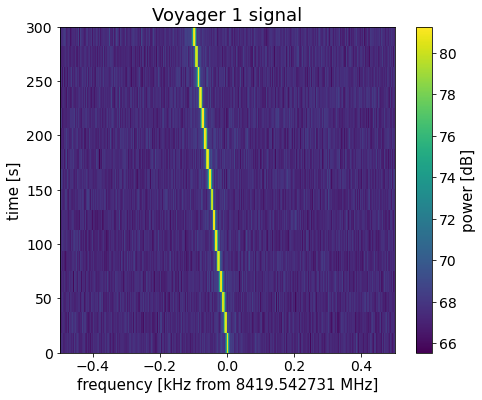

In [47]:
freqs, data = fb.grab_data()

data = np.flip(data, axis=0)
data = np.flip(data, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(7.5, 6))
plt.imshow(10*np.log10(data), aspect='auto', interpolation='None', rasterized=True, cmap='viridis', extent=((np.min(freqs)-cf)*1000, (np.max(freqs)-cf)*1000, 0, 300))
plt.xlabel(f'frequency [kHz from {cf} MHz]', size=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('time [s]', size=15)
cb = plt.colorbar()
cb.set_label(label='power [dB]', size=15)
cb.ax.tick_params(labelsize=14)
plt.title('Voyager 1 signal', size=18)
plt.savefig('/datax/scratch/benjb/Voyager_1_plot.pdf', bbox_inches='tight')
plt.show()